<a href="https://colab.research.google.com/github/badrinarayanan02/Computer-Vision/blob/main/2348507_LinearSpatialFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Spatial Filtering**

 Implement Linear Spatial Filtering using Built-in and user defined functions

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Functionality to display the images using matplotlib

In [2]:
def displayImages(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

Using OpenCV's filter2D function

In [4]:
def opencvLinearFilter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

User defined function for linear spatial filtering

In [29]:
def userDefinedLinearFilter(img, kernel):

    # getting the dimensions of the image and the kernel
    img_height, img_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # calculating the padding required for the convolution
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # initializing the filtered image
    filtered_img = np.zeros_like(img)

    # performing convolution
    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i + kernel_height, j:j + kernel_width]
            filtered_img[i, j] = np.sum(region * kernel)

    return filtered_img


array([[222, 223, 223, ..., 117, 113, 112],
       [221, 222, 223, ..., 114, 110, 109],
       [219, 220, 221, ..., 110, 107, 106],
       ...,
       [ 91,  93, 100, ..., 121, 123, 121],
       [ 91,  94, 100, ..., 117, 119, 118],
       [ 94,  96, 102, ..., 112, 114, 114]], dtype=uint8)
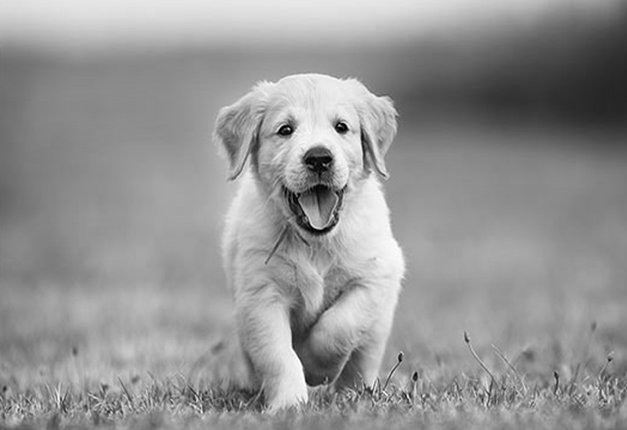

In [30]:
image_path = "/content/cutie.png"
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_img

Defining a Sobel filter for edge detection

In [31]:
sobel_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

Applying linear spatial filtering using OpenCV

In [32]:
opencv_filtered_img_sobel = opencvLinearFilter(original_img, sobel_filter)

Applying linear spatial filtering using user defined function

In [33]:
user_defined_filtered_img_sobel = userDefinedLinearFilter(original_img, sobel_filter)

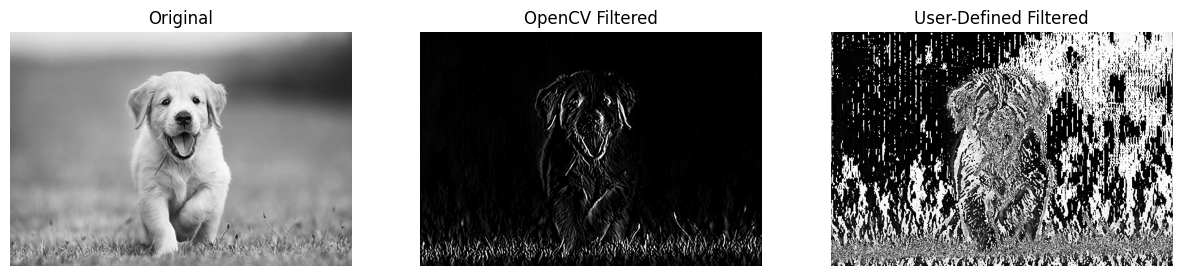

In [35]:
displayImages(
    [original_img, opencv_filtered_img_sobel, user_defined_filtered_img_sobel],
    ["Original", "OpenCV Filtered", "User-Defined Filtered"]
)